# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [10]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})


In [11]:
#create a new column "label" based on the number of tardies
def classify_tardies (i):
    if i < 5: 
      return "Low"
    else:
      return "High"  
    
#Add the labels
student_data["Tadies_label"] = student_data["Tardies"].apply(classify_tardies)
print(student_data)
    

   Age  Tardies Tadies_label
0   17       10         High
1   51        1          Low
2   27        5         High
3   21        9         High
4   36        4          Low
5   48        2          Low
6   19        9         High
7   26        6         High
8   54        0          Low
9   30        3          Low


In [12]:
#separate numercal variables then corretation 
subset_student_data = [
    'Age',
    'Tardies']

df_corretation = student_data[subset_student_data]

In [13]:
df_corretation

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

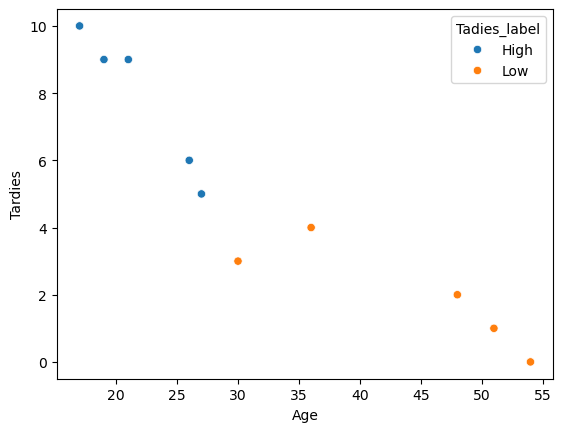

In [14]:
# Your code here
import seaborn as sns
#sns.scatterplot(data=final, x='', y='' , hue = 'label')

student_data_SP = pd.DataFrame([[6, 4, 3]], columns=['Age', 'Tadies', 'Tadies_label'])
sns.scatterplot(student_data, x='Age', y='Tardies' , hue = 'Tadies_label')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

yes, the yunger people have more tadies than the older people.

*your explanation here*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [ ]:
# your code here
#correlation between age and tardies

df_corretation.corrwith(df_corretation["Tardies"], method="spearman").sort_values(ascending=False)


#La correlación se mide con el coeficiente de correlación de Pearson, que va de -1 a 1.
#1 → correlación positiva perfecta (suben juntas).
#-1 → correlación negativa perfecta (una sube, la otra baja proporcionalmente).
#0 → no hay relación lineal aparente.


Tardies    1.000000
Age       -0.984807
dtype: float64

In [ ]:
df_corretation.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


corretation: There is negative correlation it means when age increases the tardies decreases. 

In [ ]:
#covariance


# Crear DataFrame
data = pd.DataFrame({
    'x': [17,51,27,21,36,48,19,26,54,30], #age
    'y': [10,1,5,9,4,2,9,6,0,3] #tardies
})


# Covarianza
cov_xy = data['x'].cov(data['y'])
print("Covarianza entre x e y:", cov_xy)

# Interpretación rápida
#Cov > 0 → x e y tienden a aumentar juntos.
#Cov < 0 → cuando x aumenta, y tiende a disminuir.
#Cov ≈ 0 → no hay relación lineal clara.

Covarianza entre x e y: -45.56666666666666


Covarianza entre x e y: -45.56666666666666: When age increases the tardies decreases. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [22]:
# Create an instance of the model
# we've seen this already but it bears repeating: sklearn and ML packages in general require you to create an empty model before you use it
# think of it as creating an empty list before an .append() loop or something similar
from sklearn.neighbors import KNeighborsClassifier

# define hyperparameters here
knn = KNeighborsClassifier(n_neighbors = 5)

In [16]:
student_data

,Age,Tardies,Tadies_label
0,17,10,High
1,51,1,Low
2,27,5,High
3,21,9,High
4,36,4,Low
5,48,2,Low
6,19,9,High
7,26,6,High
8,54,0,Low
9,30,3,Low


In [26]:
x= student_data[["Age"]] #i am goin to predict tardies based on age (features)
y = student_data[["Tadies_label"]]

In [20]:
#  Logically, there is a python package for this...
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.20) # 80% train, 20% test

In [23]:
# trainin in sklearn and other python ML packages is called "fit" 
# we naturally need to train in our data
knn.fit(X_train, y_train)

# your model is ready to make predictions!!! 

/opt/anaconda3/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [27]:
y_predict = knn.predict(X_test)
y_predict

array(['High', 'Low'], dtype=object)

In [28]:
# What is this score?
from sklearn import metrics
metrics.accuracy_score(y_test, y_predict)

1.0

Plot your regression model on your scatter plot.

In [ ]:
# Your code here.


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [30]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [31]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [ ]:
# Your code here.
#We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome


In [32]:
subset_vehicles =["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year","CO2 Emission Grams/Mile"]
df_vehicles = vehicles[subset_vehicles]
df_vehicles


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [33]:
df_vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


The most correlated variable with CO2 Emission Grams/Mile is Fuel Barrels/Year, with a correlation of 0.98, followed by Fuel Cost/Yea with a correlation of 0.93.
The least correlation is with "Year".



Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [36]:
x= df_vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]] #i am goin to predict tardies based on age (features)
y = df_vehicles[["CO2 Emission Grams/Mile"]]

In [37]:
#  Logically, there is a python package for this...
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.20) # 80% train, 20% test

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your code here.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*